### Part 1 Analysis the Wolfe Primates

These data represent 3 months of interactions among a troop of monkeys, observed in the wild by Linda Wolfe as they sported by a river in Ocala, Florida. Joint presence at the river was coded as an interaction and these were summed within all pairs. 

There are two files for the data. `labels.csv` is the file contains information for each monkey, with their genders, ages and their rank in the troop. `link_m.csv` is the file contains the number of their interaction in the adjacency matrix format. 

#### Part 1.1 Visualize the adjacency matrix (5 points)

Load the data and re-arrange the link matrix with the rank. Then use the following code to get the data visualization for the adjacency matrix. 
    
    plt.imshow(link_m, cmap='binary', interpolation='none')

Give title and labels for the plot.     

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Number of monkeys in labels: 20
Dimensions of interaction matrix: (20, 20)


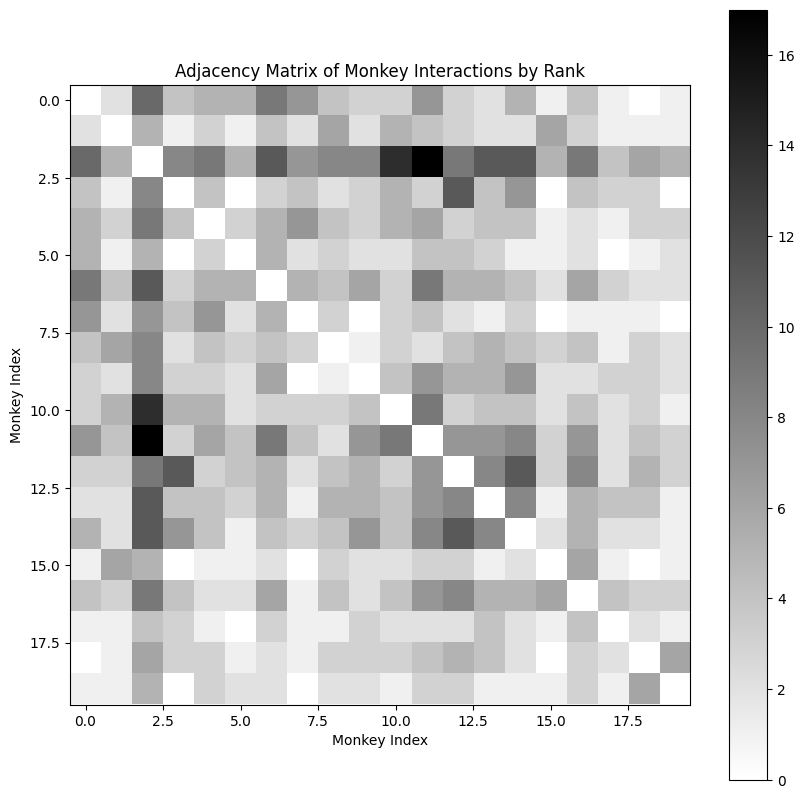

In [8]:
# Correctly loading labels with the first row used as header
labels = pd.read_csv('/Users/rahulrao/hw-5/labels.csv')

# Loading the interaction matrix without headers
link_m = pd.read_csv('/Users/rahulrao/hw-5/link_m.csv', header=None)

print("Number of monkeys in labels:", len(labels))
print("Dimensions of interaction matrix:", link_m.shape)

# Proceed if dimensions match
if len(labels) == link_m.shape[0]:
    # Sorting labels by 'Rank'
    labels_sorted = labels.sort_values('Rank').reset_index(drop=True)
    sorted_indices = labels_sorted.index.tolist()
    sorted_link_m = link_m.iloc[sorted_indices, sorted_indices]

    # Plotting the sorted adjacency matrix
    plt.figure(figsize=(10, 10))
    plt.imshow(sorted_link_m, cmap='binary', interpolation='none')
    plt.title('Adjacency Matrix of Monkey Interactions by Rank')
    plt.xlabel('Monkey Index')
    plt.ylabel('Monkey Index')
    plt.colorbar()
    plt.show()
else:
    print("Error: The number of monkeys does not match the size of the interaction matrix.")


#### Part 1.2 edgelist (5 points)

Convert the data into a edgelist data frame with three columns: source, target and weight. 

In [9]:
import pandas as pd

# Assuming you have loaded 'link_m' and 'labels' correctly
labels = pd.read_csv('/Users/rahulrao/hw-5/labels.csv')  # Loading with headers
link_m = pd.read_csv('/Users/rahulrao/hw-5/link_m.csv', header=None)  # No headers in the matrix

# Create an empty list to store edge data
edges = []

# Iterate over each cell in the matrix
for i in range(link_m.shape[0]):
    for j in range(link_m.shape[1]):
        # Only consider non-zero entries to create an edge
        if link_m.iat[i, j] > 0:
            source = labels.iloc[i]['Id']  # Get the source node ID
            target = labels.iloc[j]['Id']  # Get the target node ID
            weight = link_m.iat[i, j]  # Get the number of interactions
            edges.append((source, target, weight))

# Convert the list of edges into a DataFrame
edge_list = pd.DataFrame(edges, columns=['Source', 'Target', 'Weight'])

# Display the edge list DataFrame
print(edge_list)


     Source  Target  Weight
0         1       2       2
1         1       3      10
2         1       4       4
3         1       5       5
4         1       6       5
..      ...     ...     ...
357      20      15       1
358      20      16       1
359      20      17       3
360      20      18       1
361      20      19       6

[362 rows x 3 columns]


#### Part 1.3 Make a static network (20 points)

Use the edgelist generated from part 1.2, make a bipartite network, such that one side is for male and the other side is for female. The colors of the nodes are decided by the gender. The sizes of the nodes are decided by the age. The width of the edges are decided by the weight. 

In [10]:
pip install networkx matplotlib pandas


Note: you may need to restart the kernel to use updated packages.


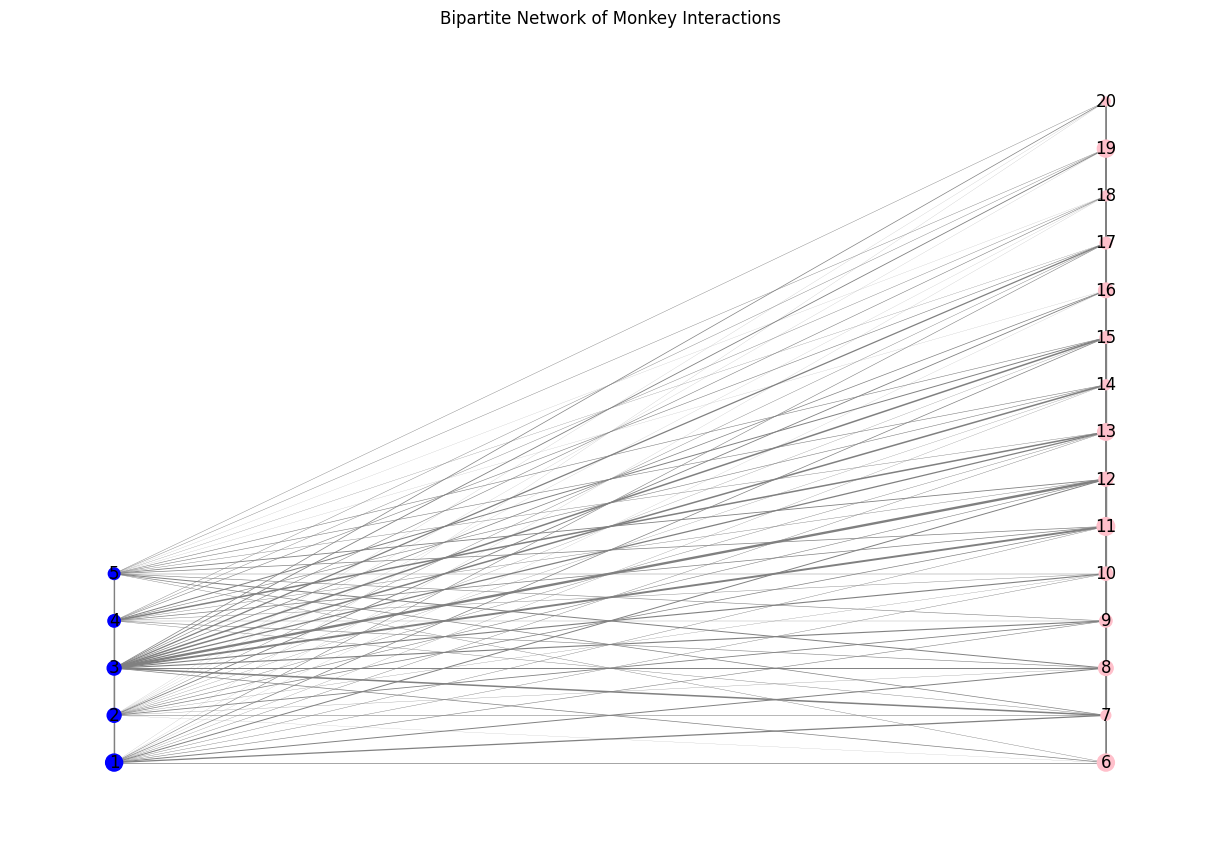

In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

labels = pd.read_csv('/Users/rahulrao/hw-5/labels.csv') 
link_m = pd.read_csv('/Users/rahulrao/hw-5/link_m.csv', header=None)
edges = []

for i in range(link_m.shape[0]):
    for j in range(link_m.shape[1]):
        if link_m.iat[i, j] > 0:
            source = labels.iloc[i]['Id']
            target = labels.iloc[j]['Id']
            weight = link_m.iat[i, j]
            edges.append((source, target, weight))

edge_list = pd.DataFrame(edges, columns=['Source', 'Target', 'Weight'])

# Create the graph
G = nx.Graph()

male_nodes = labels[labels['Sex'] == 'male']['Id'].tolist()
female_nodes = labels[labels['Sex'] == 'female']['Id'].tolist()

for index, row in labels.iterrows():
    G.add_node(row['Id'], gender=row['Sex'], age=row['Age'], bipartite=0 if row['Sex'] == 'male' else 1)

for index, row in edge_list.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

pos = {}
pos.update((node, (1, index)) for index, node in enumerate(male_nodes))  # Put male nodes at x=1
pos.update((node, (2, index)) for index, node in enumerate(female_nodes))  # Put female nodes at x=2

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color=[('blue' if G.nodes[node]['gender'] == 'male' else 'pink') for node in G.nodes], node_size=[G.nodes[node]['age']*10 for node in G.nodes], edge_color='gray', width=[G[u][v]['weight']/10 for u, v in G.edges])
plt.title("Bipartite Network of Monkey Interactions")
plt.show()


#### Part 1.4 Make an interactive network (20 points)

Now make an interactive network use the same data. No need to maintain the bipartite layout but still colors, sizes and width to customize gender, age and weights. Save the html file and submit it with the Jupyter notebook. 

In [17]:
import plotly.graph_objects as go
import networkx as nx

G = nx.from_pandas_edgelist(edge_list, 'Source', 'Target', edge_attr='Weight')

pos = nx.spring_layout(G, seed=42)

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]

# Create traces for Plotly
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        color=list(dict(G.degree).values()),
        size=10,
        colorscale='Viridis',
        line_width=2))

# Add text to nodes
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Network graph made with Plotly',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[dict(
                        text="Python code: <a href='https://plotly.com'>Plotly</a>",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()
fig.write_html("networkPlot.html")


### Part 2 Design your own social network (30 points)

Now, let's try to visualize your own social network. 

- Open an excel file.
- Set up an adjacency matrix for at least 10 people you know (not including yourself)
- Label the adjacency matrix based on your knowledge whether they know each other or not (You can just use 0/1 to indicate whether they know each other or not)
- Load the adjacency matrix to the Jupyter Notebook
- Convert then data to edgelist
- Plot the static network for your social network
- Now, include yourself into the network, plot the network again
- Discuss what you have seen in two networks and is there a specific layout you have chosen for your network. 

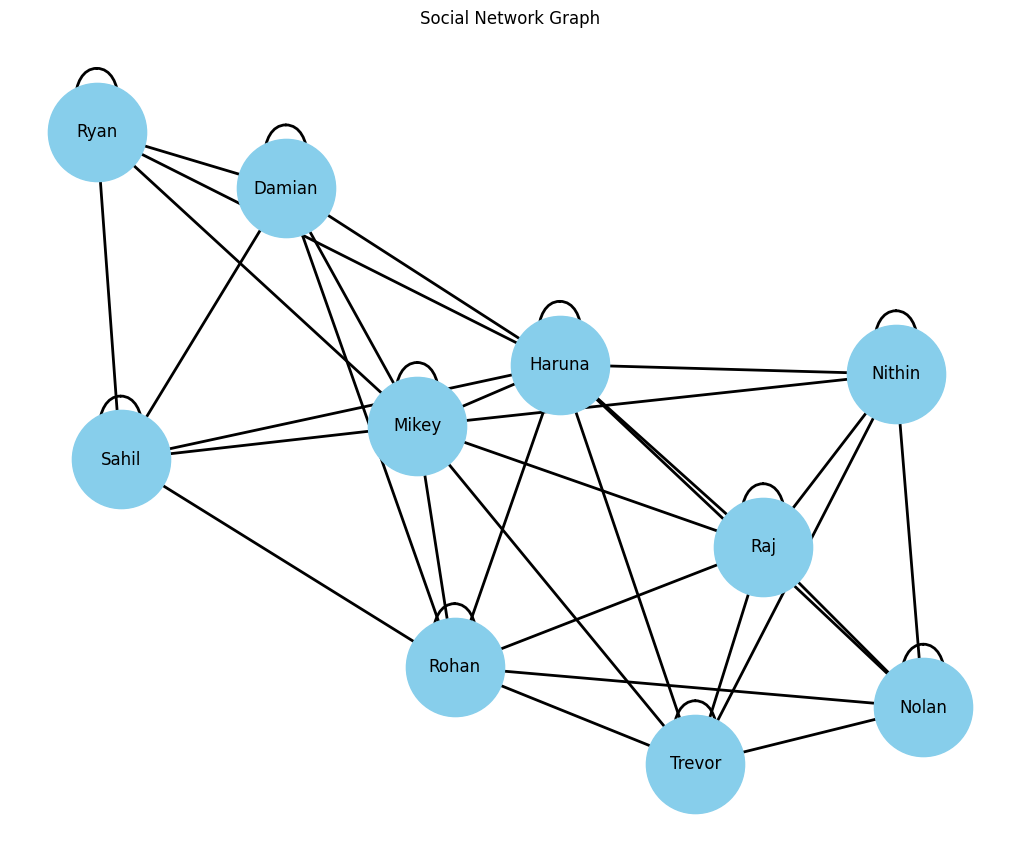

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

data = {
    'Raj': [1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
    'Mikey': [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
    'Trevor': [1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
    'Nithin': [1, 0, 1, 1, 0, 0, 1, 0, 1, 0],
    'Damian': [0, 1, 0, 0, 1, 1, 1, 1, 0, 1],
    'Ryan': [0, 1, 0, 0, 1, 1, 1, 0, 0, 1],
    'Haruna': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Rohan': [1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
    'Nolan': [1, 0, 1, 1, 0, 0, 1, 1, 1, 0],
    'Sahil': [0, 1, 0, 0, 1, 1, 1, 1, 0, 1]
}

df = pd.DataFrame(data, index=['Raj', 'Mikey', 'Trevor', 'Nithin', 'Damian', 'Ryan', 'Haruna', 'Rohan', 'Nolan', 'Sahil'])

G = nx.from_pandas_adjacency(df)

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Node position layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='skyblue', edge_color='black', width=2)
plt.title('Social Network Graph')
plt.show()


### Part 3 In-class activities in lecture 17

Write a paragraph about the importance of data visualization in data analysis (about 100 words). Then identify the logic flow in your writing. 


Data visualization is a critical component of data analysis as it provides an intuitive way to see and understand trends, outliers, and patterns in data. By transforming numbers into graphical representations, data visualization helps analysts and stakeholders quickly digest large amounts of information, making complex data more accessible, understandable, and usable. Visual tools and diagrams, such as charts, graphs, and maps, enable decision-makers to grasp difficult concepts and identify new patterns that might not be evident in raw data. Moreover, visualization facilitates a faster decision-making process by simplifying the insights extracted from the data and highlighting crucial changes and ongoing trends in a digestible format.

Logic Flow in the Writing:
Introduction to the Concept: It starts by establishing the fundamental role of data visualization in data analysis.
Utility in Data Interpretation: The paragraph elaborates on how visualization aids in the comprehension of trends, outliers, and patterns.
Enhancement of Data Accessibility: It discusses how visual representations make complex data easily understandable for all stakeholders.
Support in Decision-Making: It concludes by emphasizing the role of data visualization in facilitating quick and informed decision-making processes, underlining its importance in transforming data into actionable insights.